In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
#savasy/bert-turkish-text-classification modeli

Training fold 1


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training fold 2


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training fold 3


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training fold 4


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training fold 5


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Mean Accuracy: 0.9820408163265306
Mean Precision: 0.9822349660073384
Mean Recall: 0.9820408163265306
Mean F1-Score: 0.9820229510011232

Final Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       700
           1       0.97      0.97      0.97       700
           2       0.99      1.00      0.99       700
           3       0.98      0.99      0.98       700
           4       0.98      0.97      0.98       700
           5       1.00      1.00      1.00       700
           6       0.98      0.97      0.98       700

    accuracy                           0.98      4900
   macro avg       0.98      0.98      0.98      4900
weighted avg       0.98      0.98      0.98      4900



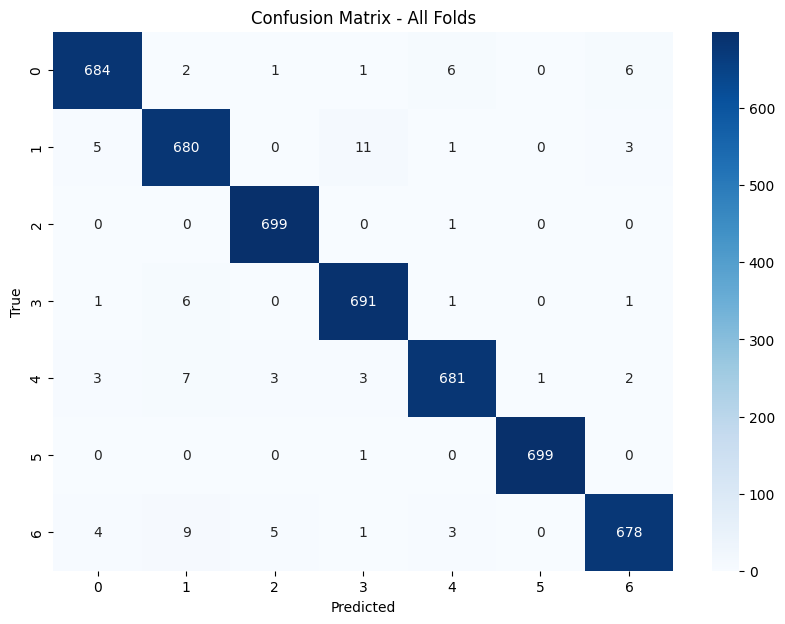

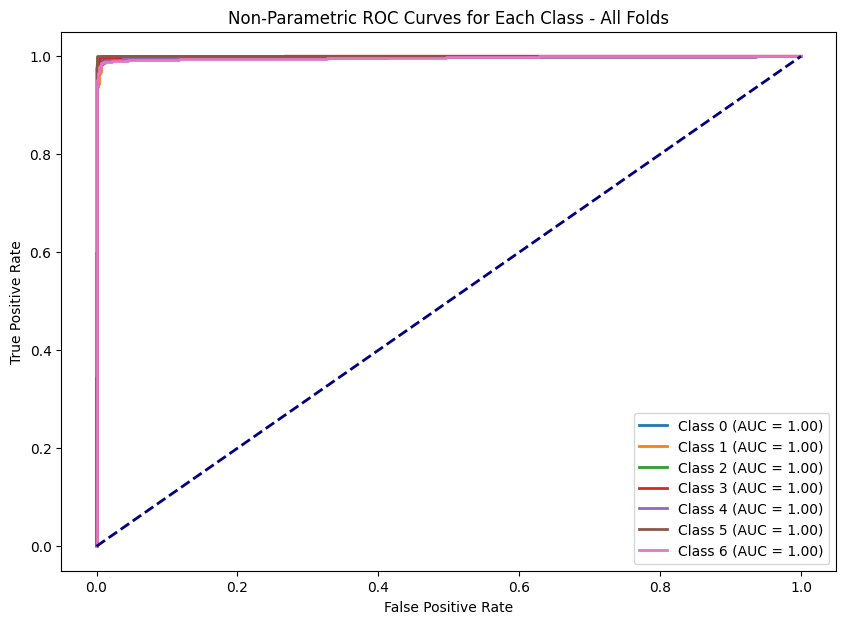

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from datasets import Dataset
from sklearn.model_selection import train_test_split, StratifiedKFold
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vektörleştirme
from scipy.stats import gaussian_kde  # KDE için kullanılıyor

# Etiketler için dönüşüm sözlüğü
code_to_label = {
    'LABEL_0': 'dunya ',
    'LABEL_1': 'ekonomi ',
    'LABEL_2': 'kultur ',
    'LABEL_3': 'saglik ',
    'LABEL_4': 'siyaset ',
    'LABEL_5': 'spor ',
    'LABEL_6': 'teknoloji '
}

# Veriyi yükle
df = pd.read_csv('/content/7allV03.csv')  # Dosyanın yolunu belirt

# 'Stanza Lemmas' ve 'category' sütunları ile işlem yap
df['text'] = df['text'].astype(str)

# Veriyi eğitim ve test olarak ayır
X = df['text']
y = df['category']

# Etiketlerin sayısal hale getirilmesi
label_map = {label: index for index, label in enumerate(code_to_label.values())}
y = y.map(label_map)  # 'category' sütunundaki etiketleri sayısal hale getiriyoruz

# TF-IDF Vektörleştirme
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(X)

# StratifiedKFold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modeli yükle (fine-tuned Turkish)
model = BertForSequenceClassification.from_pretrained('savasy/bert-turkish-text-classification', num_labels=7)

# Tokenizer'ı yükle
tokenizer = BertTokenizer.from_pretrained('savasy/bert-turkish-text-classification')

# Tokenization fonksiyonu
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=128, return_tensors="pt")

# K-Fold değerlendirme
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

all_predictions = []
all_labels = []
all_probabilities = []  # Her fold için tahmin edilen olasılıkları tutacağız

for fold, (train_idx, val_idx) in enumerate(skf.split(X_vec, y)):
    print(f"Training fold {fold+1}")

    # Eğitim ve validation setini oluştur
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Hugging Face Dataset oluşturma
    train_data = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
    val_data = Dataset.from_pandas(pd.DataFrame({'text': X_val, 'label': y_val}))

    # Tokenize veriyi
    train_data = train_data.map(tokenize_function, batched=True)
    val_data = val_data.map(tokenize_function, batched=True)

    # DataLoader oluşturma
    train_dataset = TensorDataset(torch.stack([torch.tensor(example['input_ids']) for example in train_data], dim=0),
                                  torch.stack([torch.tensor(example['attention_mask']) for example in train_data], dim=0),
                                  torch.tensor([example['label'] for example in train_data]))

    val_dataset = TensorDataset(torch.stack([torch.tensor(example['input_ids']) for example in val_data], dim=0),
                                torch.stack([torch.tensor(example['attention_mask']) for example in val_data], dim=0),
                                torch.tensor([example['label'] for example in val_data]))

    train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=16)

    # AdamW optimizer
    optimizer = AdamW(model.parameters(), lr=5e-5)

    # Modeli eğitim için GPU'ya taşı
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Eğitim
    model.train()
    for epoch in range(3):  # 3 epoch ile eğitim
        for batch in train_dataloader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

    # Modeli değerlendirme
    model.eval()
    predictions = []
    labels = []
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, label = [item.to(device) for item in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            predictions.extend(preds.cpu().numpy())
            labels.extend(label.cpu().numpy())

            # Olasılıkları kaydet
            probabilities = torch.softmax(logits, dim=-1)  # Softmax çıkışı
            all_probabilities.extend(probabilities.cpu().numpy())  # Olasılıkları topla

    # Evaluation metrics
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Add predictions and labels for ROC and confusion matrix after all folds
    all_predictions.extend(predictions)
    all_labels.extend(labels)

# K-Fold Sonuçları
print(f"Mean Accuracy: {np.mean(accuracy_list)}")
print(f"Mean Precision: {np.mean(precision_list)}")
print(f"Mean Recall: {np.mean(recall_list)}")
print(f"Mean F1-Score: {np.mean(f1_list)}")

# Final Classification Report
print("\nFinal Classification Report:")
print(classification_report(all_labels, all_predictions))

# Final Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.title('Confusion Matrix - All Folds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Final Non-Parametric ROC Curve for each class using KDE
plt.figure(figsize=(10, 7))

num_classes = len(np.unique(all_labels))

# Kernel Density Estimation (KDE) for nonparametric distribution estimation
for i in range(num_classes):
    # Gerçek etiketler ve her sınıfın olasılıklarını alıyoruz
    true_class = (np.array(all_labels) == i).astype(int)

    # Tahmin edilen olasılıkları alıyoruz
    predicted_probabilities = np.array(all_probabilities)[:, i]

    # KDE uygula (Kernel Density Estimation)
    kde = gaussian_kde(predicted_probabilities, bw_method='silverman')
    kde_values = kde(np.linspace(0, 1, 1000))  # yoğunluk tahminini çiziyoruz

    # ROC eğrisini oluşturmak için fpr, tpr hesapla
    fpr, tpr, _ = roc_curve(true_class, predicted_probabilities)
    roc_auc = auc(fpr, tpr)

    # ROC eğrisini çiz
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Diyagonal çizgiyi ekleyelim
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafik özelleştirmeleri
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Non-Parametric ROC Curves for Each Class - All Folds')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#bert-base-multilingual-uncased modeli

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Training fold 1


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training fold 2


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training fold 3


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training fold 4


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training fold 5


Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Mean Accuracy: 0.9540816326530613
Mean Precision: 0.9548960926967777
Mean Recall: 0.9540816326530613
Mean F1-Score: 0.9540062535675208

Final Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       700
           1       0.93      0.90      0.91       700
           2       0.97      0.99      0.98       700
           3       0.98      0.96      0.97       700
           4       0.95      0.95      0.95       700
           5       0.98      0.99      0.99       700
           6       0.95      0.96      0.95       700

    accuracy                           0.95      4900
   macro avg       0.95      0.95      0.95      4900
weighted avg       0.95      0.95      0.95      4900



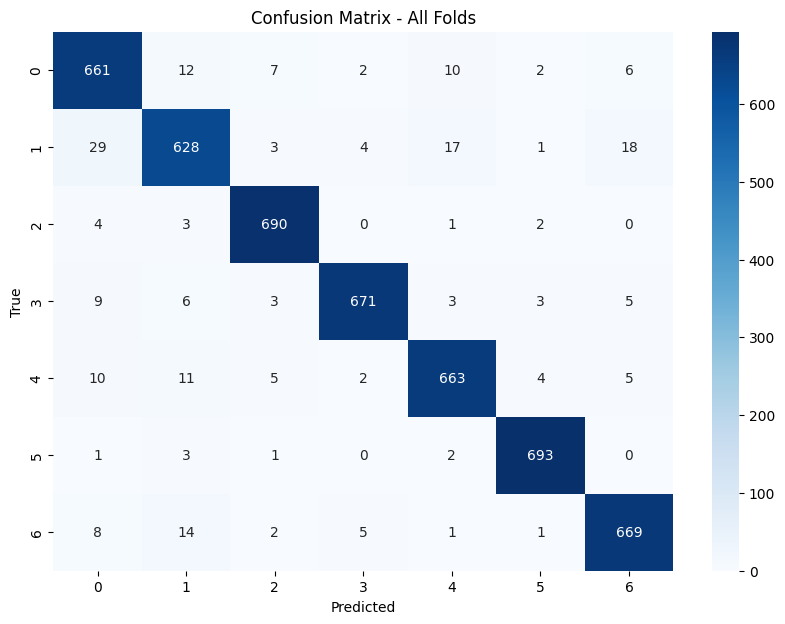

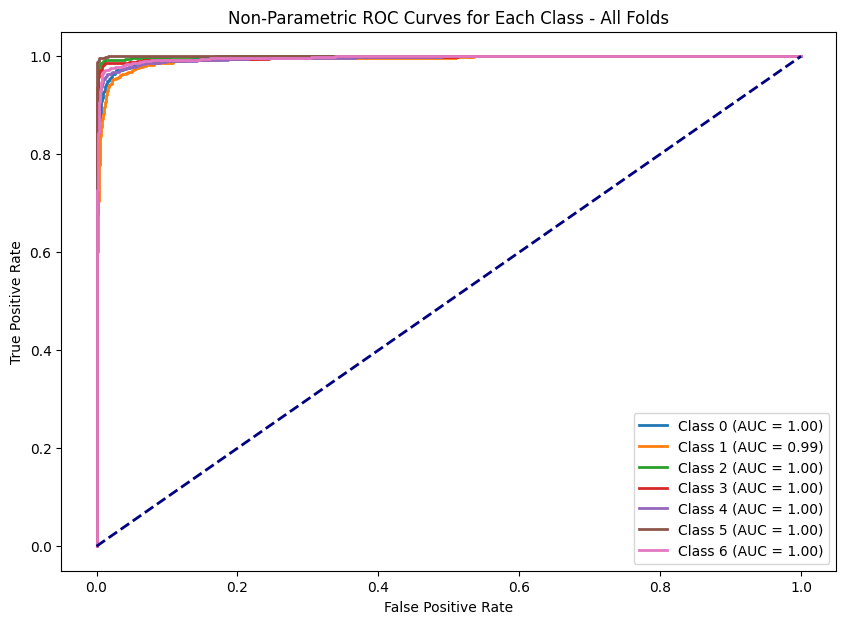

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from datasets import Dataset
from sklearn.model_selection import train_test_split, StratifiedKFold
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vektörleştirme
from scipy.stats import gaussian_kde  # KDE için kullanılıyor

# Etiketler için dönüşüm sözlüğü
code_to_label = {
    'LABEL_0': 'dunya ',
    'LABEL_1': 'ekonomi ',
    'LABEL_2': 'kultur ',
    'LABEL_3': 'saglik ',
    'LABEL_4': 'siyaset ',
    'LABEL_5': 'spor ',
    'LABEL_6': 'teknoloji '
}

# Veriyi yükle
df = pd.read_csv('/content/7allV03.csv')  # Dosyanın yolunu belirt

# 'Stanza Lemmas' ve 'category' sütunları ile işlem yap
df['text'] = df['text'].astype(str)

# Veriyi eğitim ve test olarak ayır
X = df['text']
y = df['category']

# Etiketlerin sayısal hale getirilmesi
label_map = {label: index for index, label in enumerate(code_to_label.values())}
y = y.map(label_map)  # 'category' sütunundaki etiketleri sayısal hale getiriyoruz

# TF-IDF Vektörleştirme
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(X)

# StratifiedKFold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modeli yükle (bert-base-multilingual-uncased)
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=7)

# Tokenizer'ı yükle
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# Tokenization fonksiyonu
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=128, return_tensors="pt")

# K-Fold değerlendirme
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

all_predictions = []
all_labels = []
all_probabilities = []  # Her fold için tahmin edilen olasılıkları tutacağız

for fold, (train_idx, val_idx) in enumerate(skf.split(X_vec, y)):
    print(f"Training fold {fold+1}")

    # Eğitim ve validation setini oluştur
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Hugging Face Dataset oluşturma
    train_data = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
    val_data = Dataset.from_pandas(pd.DataFrame({'text': X_val, 'label': y_val}))

    # Tokenize veriyi
    train_data = train_data.map(tokenize_function, batched=True)
    val_data = val_data.map(tokenize_function, batched=True)

    # DataLoader oluşturma
    train_dataset = TensorDataset(torch.stack([torch.tensor(example['input_ids']) for example in train_data], dim=0),
                                  torch.stack([torch.tensor(example['attention_mask']) for example in train_data], dim=0),
                                  torch.tensor([example['label'] for example in train_data]))

    val_dataset = TensorDataset(torch.stack([torch.tensor(example['input_ids']) for example in val_data], dim=0),
                                torch.stack([torch.tensor(example['attention_mask']) for example in val_data], dim=0),
                                torch.tensor([example['label'] for example in val_data]))

    train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=16)

    # AdamW optimizer
    optimizer = AdamW(model.parameters(), lr=5e-5)

    # Modeli eğitim için GPU'ya taşı
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Eğitim
    model.train()
    for epoch in range(3):  # 3 epoch ile eğitim
        for batch in train_dataloader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

    # Modeli değerlendirme
    model.eval()
    predictions = []
    labels = []
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, label = [item.to(device) for item in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            predictions.extend(preds.cpu().numpy())
            labels.extend(label.cpu().numpy())

            # Olasılıkları kaydet
            probabilities = torch.softmax(logits, dim=-1)  # Softmax çıkışı
            all_probabilities.extend(probabilities.cpu().numpy())  # Olasılıkları topla

    # Evaluation metrics
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Add predictions and labels for ROC and confusion matrix after all folds
    all_predictions.extend(predictions)
    all_labels.extend(labels)

# K-Fold Sonuçları
print(f"Mean Accuracy: {np.mean(accuracy_list)}")
print(f"Mean Precision: {np.mean(precision_list)}")
print(f"Mean Recall: {np.mean(recall_list)}")
print(f"Mean F1-Score: {np.mean(f1_list)}")

# Final Classification Report
print("\nFinal Classification Report:")
print(classification_report(all_labels, all_predictions))

# Final Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.title('Confusion Matrix - All Folds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Final Non-Parametric ROC Curve for each class using KDE
plt.figure(figsize=(10, 7))

num_classes = len(np.unique(all_labels))

# Kernel Density Estimation (KDE) for nonparametric distribution estimation
for i in range(num_classes):
    # Gerçek etiketler ve her sınıfın olasılıklarını alıyoruz
    true_class = (np.array(all_labels) == i).astype(int)

    # Tahmin edilen olasılıkları alıyoruz
    predicted_probabilities = np.array(all_probabilities)[:, i]

    # KDE uygula (Kernel Density Estimation)
    kde = gaussian_kde(predicted_probabilities, bw_method='silverman')
    kde_values = kde(np.linspace(0, 1, 1000))  # yoğunluk tahminini çiziyoruz

    # ROC eğrisini oluşturmak için fpr, tpr hesapla
    fpr, tpr, _ = roc_curve(true_class, predicted_probabilities)
    roc_auc = auc(fpr, tpr)

    # ROC eğrisini çiz
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Diyagonal çizgiyi ekleyelim
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafik özelleştirmeleri
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Non-Parametric ROC Curves for Each Class - All Folds')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/751 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Accuracy: 0.9551020408163265
Precision: 0.9567055333612184
Recall: 0.9551020408163265
F1-Score: 0.955187726844252

Final Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       131
           1       0.95      0.92      0.93       142
           2       1.00      0.91      0.95       139
           3       0.99      1.00      1.00       122
           4       0.97      0.96      0.96       158
           5       0.97      1.00      0.98       147
           6       0.88      0.97      0.92       141

    accuracy                           0.96       980
   macro avg       0.96      0.96      0.96       980
weighted avg       0.96      0.96      0.96       980



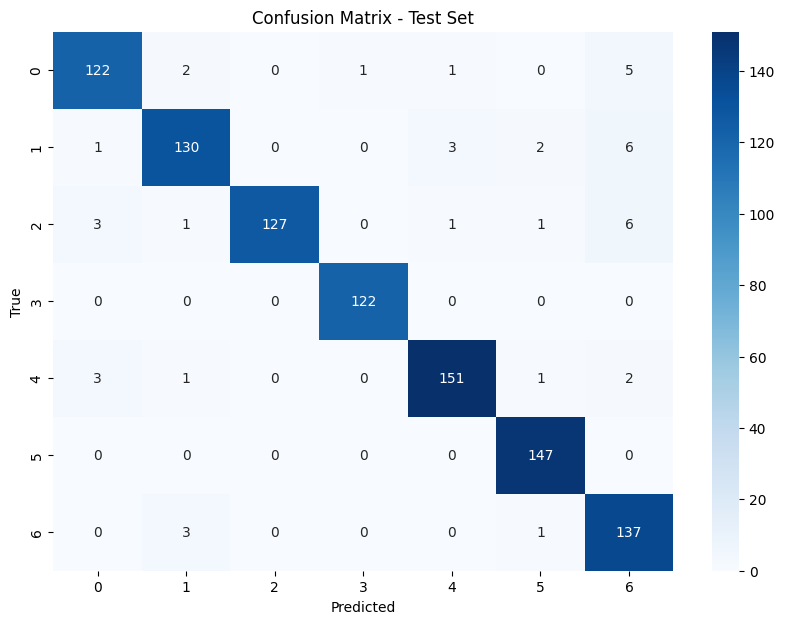

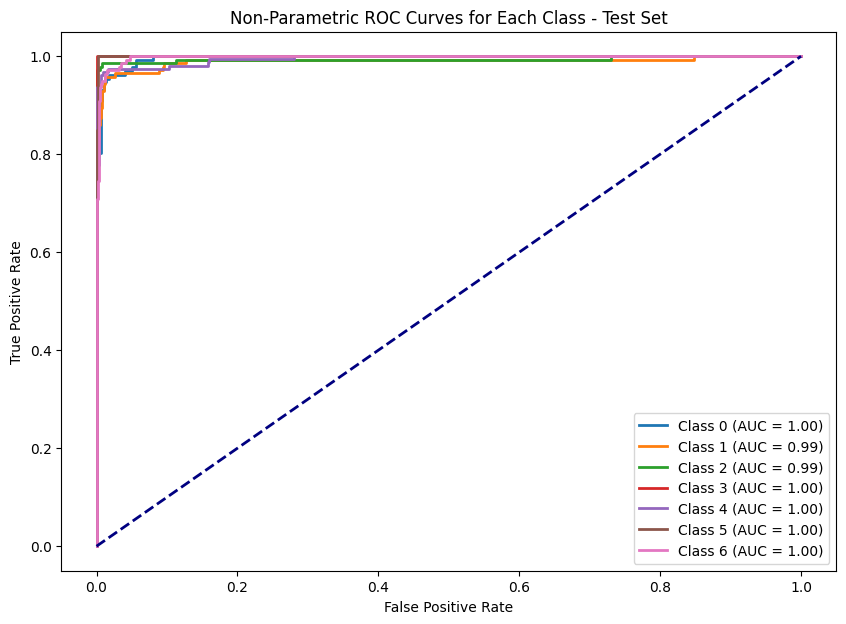

In [3]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from scipy.stats import gaussian_kde  # KDE için kullanılıyor

# Etiketler için dönüşüm sözlüğü
code_to_label = {
    'LABEL_0': 'dunya ',
    'LABEL_1': 'ekonomi ',
    'LABEL_2': 'kultur ',
    'LABEL_3': 'saglik ',
    'LABEL_4': 'siyaset ',
    'LABEL_5': 'spor ',
    'LABEL_6': 'teknoloji '
}

# Veriyi yükle
df = pd.read_csv('/content/7allV03.csv')  # Dosyanın yolunu belirt

# 'Stanza Lemmas' ve 'category' sütunları ile işlem yap
df['text'] = df['text'].astype(str)

# Veriyi eğitim ve test olarak ayır
X = df['text']
y = df['category']

# Etiketlerin sayısal hale getirilmesi
label_map = {label: index for index, label in enumerate(code_to_label.values())}
y = y.map(label_map)  # 'category' sütunundaki etiketleri sayısal hale getiriyoruz

# Eğitim ve test verisi bölme (train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli yükle (fine-tuned Turkish)
model = BertForSequenceClassification.from_pretrained('savasy/bert-turkish-text-classification', num_labels=7)

# Tokenizer'ı yükle
tokenizer = BertTokenizer.from_pretrained('savasy/bert-turkish-text-classification')

# Tokenization fonksiyonu
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=128, return_tensors="pt")

# Hugging Face Dataset oluşturma
train_data = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
test_data = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'label': y_test}))

# Tokenize veriyi
train_data = train_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

# DataLoader oluşturma
train_dataset = TensorDataset(torch.stack([torch.tensor(example['input_ids']) for example in train_data], dim=0),
                              torch.stack([torch.tensor(example['attention_mask']) for example in train_data], dim=0),
                              torch.tensor([example['label'] for example in train_data]))

test_dataset = TensorDataset(torch.stack([torch.tensor(example['input_ids']) for example in test_data], dim=0),
                             torch.stack([torch.tensor(example['attention_mask']) for example in test_data], dim=0),
                             torch.tensor([example['label'] for example in test_data]))

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# AdamW optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Modeli eğitim için GPU'ya taşı
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Eğitim
model.train()
for epoch in range(3):  # 3 epoch ile eğitim
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Modeli değerlendirme
model.eval()
predictions = []
labels = []
all_probabilities = []  # Olasılıkları kaydetmek için

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, label = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)
        predictions.extend(preds.cpu().numpy())
        labels.extend(label.cpu().numpy())

        # Olasılıkları kaydet
        probabilities = torch.softmax(logits, dim=-1)  # Softmax çıkışı
        all_probabilities.extend(probabilities.cpu().numpy())  # Olasılıkları topla

# Evaluation metrics
accuracy = accuracy_score(labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Final Classification Report
print("\nFinal Classification Report:")
print(classification_report(labels, predictions))

# Final Confusion Matrix
cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Final Non-Parametric ROC Curve for each class
plt.figure(figsize=(10, 7))

num_classes = len(np.unique(labels))

# Kernel Density Estimation (KDE) for nonparametric distribution estimation
for i in range(num_classes):
    # Gerçek etiketler ve her sınıfın olasılıklarını alıyoruz
    true_class = (np.array(labels) == i).astype(int)

    # Tahmin edilen olasılıkları alıyoruz
    predicted_probabilities = np.array(all_probabilities)[:, i]

    # KDE uygula (Kernel Density Estimation)
    kde = gaussian_kde(predicted_probabilities, bw_method='silverman')
    kde_values = kde(np.linspace(0, 1, 1000))  # yoğunluk tahminini çiziyoruz

    # ROC eğrisini oluşturmak için fpr, tpr hesapla
    fpr, tpr, _ = roc_curve(true_class, predicted_probabilities)
    roc_auc = auc(fpr, tpr)

    # ROC eğrisini çiz
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Diyagonal çizgiyi ekleyelim
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafik özelleştirmeleri
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Non-Parametric ROC Curves for Each Class - Test Set')
plt.legend(loc='lower right')
plt.show()


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Map:   0%|          | 0/3920 [00:00<?, ? examples/s]

Map:   0%|          | 0/980 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Accuracy: 0.9010204081632653
Precision: 0.9027649358871778
Recall: 0.9010204081632653
F1-Score: 0.9003289673558434

Final Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       131
           1       0.90      0.77      0.83       142
           2       0.93      0.91      0.92       139
           3       0.96      0.93      0.95       122
           4       0.91      0.87      0.89       158
           5       0.94      1.00      0.97       147
           6       0.83      0.94      0.88       141

    accuracy                           0.90       980
   macro avg       0.90      0.90      0.90       980
weighted avg       0.90      0.90      0.90       980



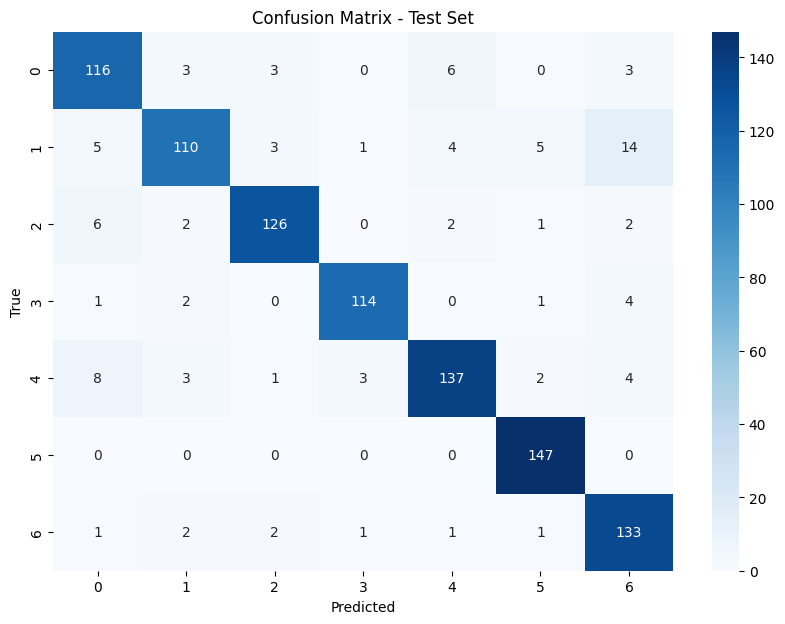

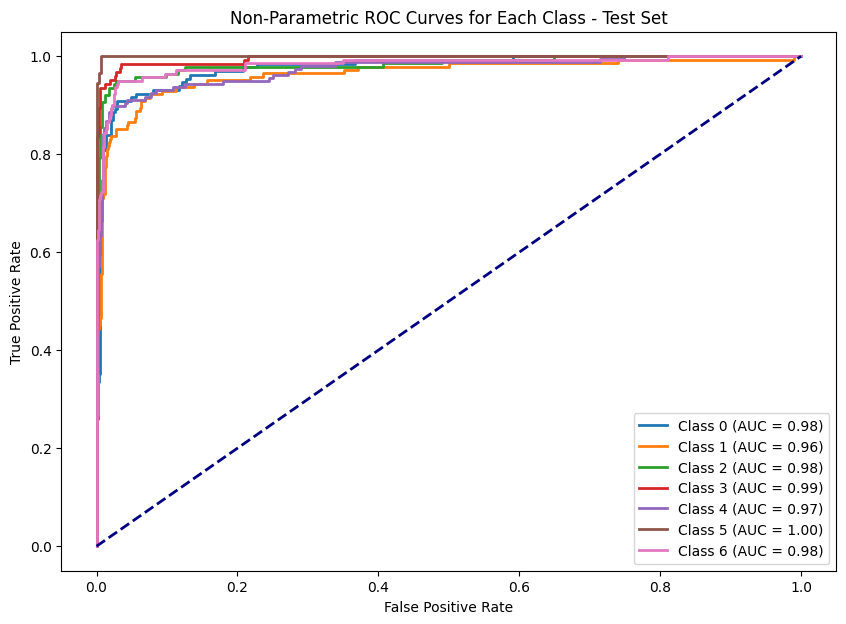

In [4]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from scipy.stats import gaussian_kde  # KDE için kullanılıyor

# Etiketler için dönüşüm sözlüğü
code_to_label = {
    'LABEL_0': 'dunya ',
    'LABEL_1': 'ekonomi ',
    'LABEL_2': 'kultur ',
    'LABEL_3': 'saglik ',
    'LABEL_4': 'siyaset ',
    'LABEL_5': 'spor ',
    'LABEL_6': 'teknoloji '
}

# Veriyi yükle
df = pd.read_csv('/content/7allV03.csv')  # Dosyanın yolunu belirt

# 'Stanza Lemmas' ve 'category' sütunları ile işlem yap
df['text'] = df['text'].astype(str)

# Veriyi eğitim ve test olarak ayır
X = df['text']
y = df['category']

# Etiketlerin sayısal hale getirilmesi
label_map = {label: index for index, label in enumerate(code_to_label.values())}
y = y.map(label_map)  # 'category' sütunundaki etiketleri sayısal hale getiriyoruz

# Eğitim ve test verisi bölme (train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli yükle (bert-base-multilingual-uncased)
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=7)

# Tokenizer'ı yükle
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# Tokenization fonksiyonu
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=128, return_tensors="pt")

# Hugging Face Dataset oluşturma
train_data = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
test_data = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'label': y_test}))

# Tokenize veriyi
train_data = train_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

# DataLoader oluşturma
train_dataset = TensorDataset(torch.stack([torch.tensor(example['input_ids']) for example in train_data], dim=0),
                              torch.stack([torch.tensor(example['attention_mask']) for example in train_data], dim=0),
                              torch.tensor([example['label'] for example in train_data]))

test_dataset = TensorDataset(torch.stack([torch.tensor(example['input_ids']) for example in test_data], dim=0),
                             torch.stack([torch.tensor(example['attention_mask']) for example in test_data], dim=0),
                             torch.tensor([example['label'] for example in test_data]))

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# AdamW optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Modeli eğitim için GPU'ya taşı
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Eğitim
model.train()
for epoch in range(3):  # 3 epoch ile eğitim
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Modeli değerlendirme
model.eval()
predictions = []
labels = []
all_probabilities = []  # Olasılıkları kaydetmek için

with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, label = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)
        predictions.extend(preds.cpu().numpy())
        labels.extend(label.cpu().numpy())

        # Olasılıkları kaydet
        probabilities = torch.softmax(logits, dim=-1)  # Softmax çıkışı
        all_probabilities.extend(probabilities.cpu().numpy())  # Olasılıkları topla

# Evaluation metrics
accuracy = accuracy_score(labels, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Final Classification Report
print("\nFinal Classification Report:")
print(classification_report(labels, predictions))

# Final Confusion Matrix
cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Final Non-Parametric ROC Curve for each class
plt.figure(figsize=(10, 7))

num_classes = len(np.unique(labels))

# Kernel Density Estimation (KDE) for nonparametric distribution estimation
for i in range(num_classes):
    # Gerçek etiketler ve her sınıfın olasılıklarını alıyoruz
    true_class = (np.array(labels) == i).astype(int)

    # Tahmin edilen olasılıkları alıyoruz
    predicted_probabilities = np.array(all_probabilities)[:, i]

    # KDE uygula (Kernel Density Estimation)
    kde = gaussian_kde(predicted_probabilities, bw_method='silverman')
    kde_values = kde(np.linspace(0, 1, 1000))  # yoğunluk tahminini çiziyoruz

    # ROC eğrisini oluşturmak için fpr, tpr hesapla
    fpr, tpr, _ = roc_curve(true_class, predicted_probabilities)
    roc_auc = auc(fpr, tpr)

    # ROC eğrisini çiz
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Diyagonal çizgiyi ekleyelim
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Grafik özelleştirmeleri
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Non-Parametric ROC Curves for Each Class - Test Set')
plt.legend(loc='lower right')
plt.show()
